<a href="https://colab.research.google.com/github/NikRed17/Dataset8/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [26]:
# Преобразование датасета (процессинг категориальных признаков)
df_not_processed = df.copy()  # копия данных

# Обработка категориальных признаков
category_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Категориальные колонки:", category_columns)

# One-Hot Encoding для категориальных признаков
df_processed = pd.get_dummies(df, columns=category_columns, drop_first=True)

# Масштабирование данных
scaler = StandardScaler()
numeric_columns = df_processed.select_dtypes(include=['float64', 'int64']).columns
df_processed[numeric_columns] = scaler.fit_transform(df_processed[numeric_columns])

print("\nПосле обработки - размер:", df_processed.shape)
print("Колонки после обработки:")
print(df_processed.columns.tolist())

Категориальные колонки: ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']

После обработки - размер: (374, 47)
Колонки после обработки:
['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Gender_Male', 'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Nurse', 'Occupation_Sales Representative', 'Occupation_Salesperson', 'Occupation_Scientist', 'Occupation_Software Engineer', 'Occupation_Teacher', 'BMI Category_Normal Weight', 'BMI Category_Obese', 'BMI Category_Overweight', 'Blood Pressure_115/78', 'Blood Pressure_117/76', 'Blood Pressure_118/75', 'Blood Pressure_118/76', 'Blood Pressure_119/77', 'Blood Pressure_120/80', 'Blood Pressure_121/79', 'Blood Pressure_122/80', 'Blood Pressure_125/80', 'Blood Pressure_125/82', 'Blood Pressure_126/83', 'Blood Pressure_128/84', 'Blood Pressure_128/85', 'Blood Pressure_129/84', 'Blood Pressure_

In [27]:
# Подготовка данных для кластеризации
X = df_processed.values

In [28]:
# K-means кластеризация
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X)

# Добавляем кластеры в df_not_processed
df_not_processed['cluster_kmeans'] = clusters_kmeans

# Статистика по кластерам
print("Распределение по кластерам K-means:")
print(df_not_processed['cluster_kmeans'].value_counts().sort_index())

# Средние значения по кластерам (только числовые колонки)
numeric_cols = df_not_processed.select_dtypes(include=[np.number]).columns.tolist()
# Убираем Person ID из анализа
numeric_cols = [col for col in numeric_cols if col != 'Person ID' and col != 'cluster_kmeans']

print("\nСредние значения по кластерам (ключевые признаки):")
cluster_stats = df_not_processed.groupby('cluster_kmeans')[numeric_cols].mean()
key_columns = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
              'Stress Level', 'Daily Steps', 'Heart Rate']
print(cluster_stats[key_columns].round(2))

Распределение по кластерам K-means:
cluster_kmeans
0    240
1     32
2    102
Name: count, dtype: int64

Средние значения по кластерам (ключевые признаки):
                  Age  Sleep Duration  Quality of Sleep  \
cluster_kmeans                                            
0               43.02            7.60              8.05   
1               49.75            6.07              6.00   
2               37.83            6.35              6.00   

                Physical Activity Level  Stress Level  Daily Steps  Heart Rate  
cluster_kmeans                                                                  
0                                 63.02          4.28      6945.00       67.98  
1                                 90.00          8.00     10000.00       75.00  
2                                 40.44          7.17      5516.67       73.78  


Кластер 0 (Основная группа): "Здоровые и выспавшиеся"

Самый качественный сон (8.05) и наибольшая его продолжительность (7.6 часов).

Умеренный уровень стресса (4.28) и самый низкий пульс (68).

Это самая большая и, вероятно, самая здоровая группа.

Кластер 1 (Маленькая группа): "Активные, но stressed-out"

Самый старший средний возраст (~50 лет).

Самый высокий уровень физической активности (90) и рекордное количество шагов (10000).

Однако у них наихудший сон (6 часов, качество 6) и максимальный уровень стресса (8). Высокая активность не спасает от стресса и проблем со сном.

Кластер 2 (102): "Молодые и малоподвижные"

Самые молодые (средний возраст ~38 лет).

Самая низкая физическая активность (40.44) и наименьшее количество шагов (5500).

Высокий уровень стресса (7.17) и плохой сон.

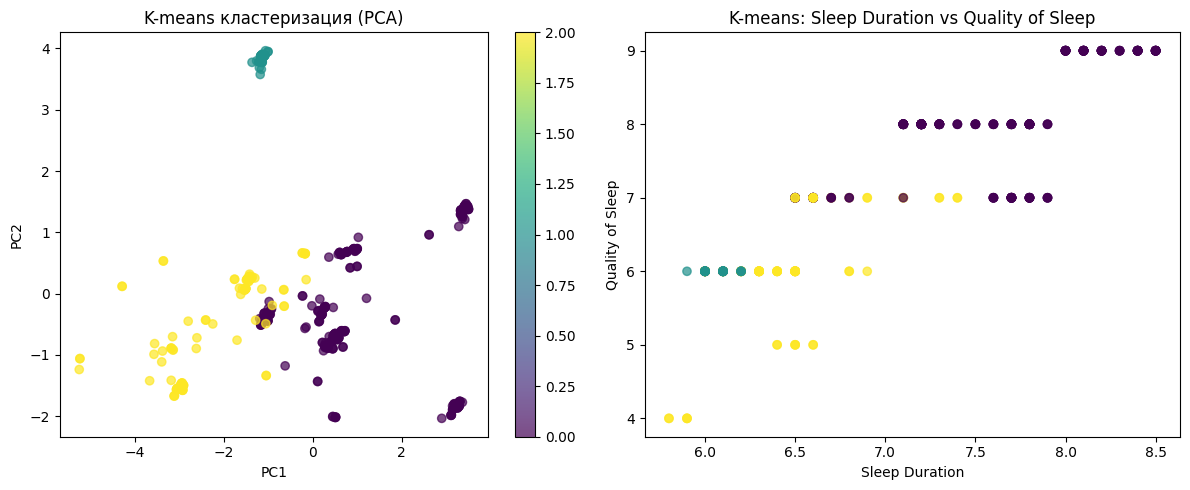

In [29]:
# Визуализация кластеров K-means с помощью PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_kmeans, cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means кластеризация (PCA)')

plt.subplot(1, 2, 2)
# Визуализация по ключевым признакам
plt.scatter(df_not_processed['Sleep Duration'], df_not_processed['Quality of Sleep'],
           c=clusters_kmeans, cmap='viridis', alpha=0.7)
plt.xlabel('Sleep Duration')
plt.ylabel('Quality of Sleep')
plt.title('K-means: Sleep Duration vs Quality of Sleep')

plt.tight_layout()
plt.show()

In [30]:
# Метрики качества для K-means
silhouette_kmeans = silhouette_score(X, clusters_kmeans)
dbi_kmeans = davies_bouldin_score(X, clusters_kmeans)
chi_kmeans = calinski_harabasz_score(X, clusters_kmeans)

print("Метрики качества K-means кластеризации:")
print(f"Silhouette Score: {silhouette_kmeans:.3f}")
print(f"Davies-Bouldin Index: {dbi_kmeans:.3f}")
print(f"Calinski-Harabasz Index: {chi_kmeans:.3f}")

# Объяснение принципа кластеризации
print("\nОбъяснение кластеров K-means:")
for cluster in sorted(df_not_processed['cluster_kmeans'].unique()):
    cluster_data = df_not_processed[df_not_processed['cluster_kmeans'] == cluster]
    print(f"\nКластер {cluster} ({len(cluster_data)}):")
    print(f"  Средний возраст: {cluster_data['Age'].mean():.1f}")
    print(f"  Длительность сна: {cluster_data['Sleep Duration'].mean():.1f} часов")
    print(f"  Качество сна: {cluster_data['Quality of Sleep'].mean():.1f}/10")
    print(f"  Уровень стресса: {cluster_data['Stress Level'].mean():.1f}/10")
    print(f"  Физическая активность: {cluster_data['Physical Activity Level'].mean():.1f} мин/день")
    print(f"  Среднее количество шагов: {cluster_data['Daily Steps'].mean():.0f}")

    # Анализ категориальных признаков
    if 'Gender' in cluster_data.columns:
        gender_dist = cluster_data['Gender'].value_counts()
        print(f"  Распределение по полу: {gender_dist.to_dict()}")

    if 'BMI Category' in cluster_data.columns:
        bmi_dist = cluster_data['BMI Category'].value_counts().head(3)
        print(f"  Основные BMI категории: {bmi_dist.to_dict()}")

    if 'Sleep Disorder' in cluster_data.columns:
        disorder_dist = cluster_data['Sleep Disorder'].value_counts()
        print(f"  Расстройства сна: {disorder_dist.to_dict()}")

Метрики качества K-means кластеризации:
Silhouette Score: 0.351
Davies-Bouldin Index: 1.085
Calinski-Harabasz Index: 123.439

Объяснение кластеров K-means:

Кластер 0 (240):
  Средний возраст: 43.0
  Длительность сна: 7.6 часов
  Качество сна: 8.0/10
  Уровень стресса: 4.3/10
  Физическая активность: 63.0 мин/день
  Среднее количество шагов: 6945
  Распределение по полу: {'Female': 133, 'Male': 107}
  Основные BMI категории: {'Normal': 162, 'Overweight': 61, 'Normal Weight': 15}
  Расстройства сна: {'Sleep Apnea': 36, 'Insomnia': 31}

Кластер 1 (32):
  Средний возраст: 49.8
  Длительность сна: 6.1 часов
  Качество сна: 6.0/10
  Уровень стресса: 8.0/10
  Физическая активность: 90.0 мин/день
  Среднее количество шагов: 10000
  Распределение по полу: {'Female': 32}
  Основные BMI категории: {'Overweight': 32}
  Расстройства сна: {'Sleep Apnea': 29, 'Insomnia': 1}

Кластер 2 (102):
  Средний возраст: 37.8
  Длительность сна: 6.4 часов
  Качество сна: 6.0/10
  Уровень стресса: 7.2/10
  Физи

Silhouette Score - 0.351 Умеренное, но не идеальное качество кластеризации. Кластеры различимы, но есть некоторое перекрытие между ними

Davies–Bouldin Index - 1.085 кластеры достаточно компактны и похожи

 Calinski–Harabasz Index - 123.439 Хорошее разделение кластеров — расстояния между кластерами значительно больше, чем расстояния внутри кластеров

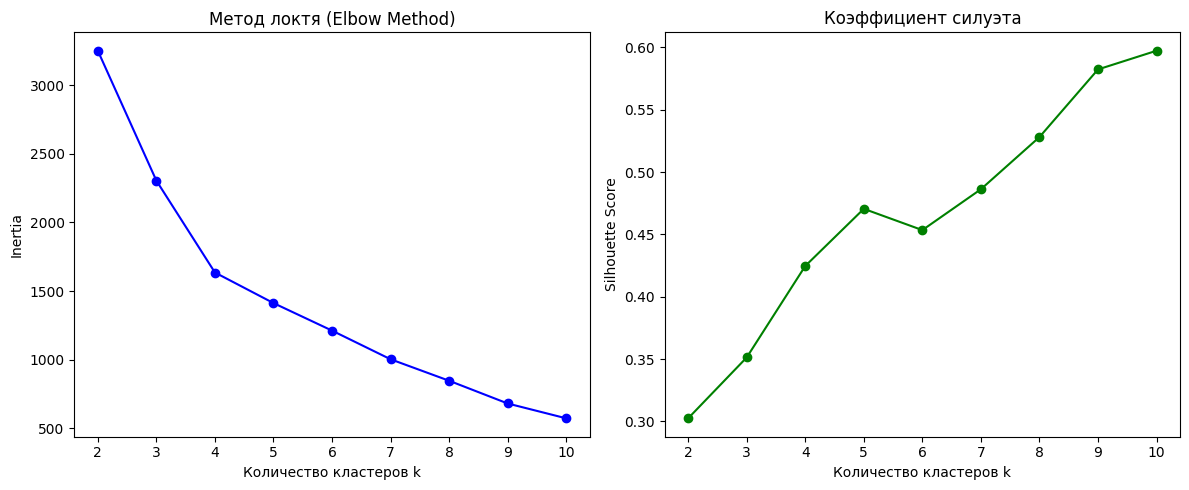

In [31]:
inertias = []
silhouettes = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    inertias.append(kmeans.inertia_)  # внутренняя метрика K-Means
    silhouettes.append(silhouette_score(X, kmeans.labels_))  # внешняя метрика

# Визуализация "метода локтя"
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K, inertias, 'bo-')
plt.xlabel('Количество кластеров k')
plt.ylabel('Inertia')
plt.title('Метод локтя (Elbow Method)')

plt.subplot(1,2,2)
plt.plot(K, silhouettes, 'go-')
plt.xlabel('Количество кластеров k')
plt.ylabel('Silhouette Score')
plt.title('Коэффициент силуэта')
plt.tight_layout()
plt.show()

Метод локтя: Четкий "изгиб" при k=3-4

Коэффициент силуэта: При k=3-4 значение 0.35-0.43 — удовлетворительное качество

In [32]:
# DBSCAN кластеризация
# Подбор оптимальных параметров для DBSCAN
eps_values = [0.5, 0.7, 1.0, 1.2, 1.5]
min_samples_values = [3, 5, 7, 10]

best_silhouette = -1
best_params = None
best_clusters = None

print("Подбор параметров DBSCAN:")
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters_db = dbscan.fit_predict(X)

        # Убираем выбросы для расчета метрик
        mask = clusters_db != -1
        if len(set(clusters_db[mask])) > 1 and np.sum(mask) > 10:
            sil_score = silhouette_score(X[mask], clusters_db[mask])
            n_clusters = len(set(clusters_db[mask]))
            n_noise = np.sum(clusters_db == -1)

            print(f"eps={eps}, min_samples={min_samples}: "
                  f"Silhouette={sil_score:.3f}, Кластеров={n_clusters}, Шум={n_noise}")

            if sil_score > best_silhouette:
                best_silhouette = sil_score
                best_params = (eps, min_samples)
                best_clusters = clusters_db.copy()

# Применяем лучшие параметры
if best_params is not None:
    eps_opt, min_samples_opt = best_params
    dbscan_optimal = DBSCAN(eps=eps_opt, min_samples=min_samples_opt)
    clusters_dbscan = dbscan_optimal.fit_predict(X)

    df_not_processed['cluster_dbscan'] = clusters_dbscan

    print(f"\nЛучшие параметры DBSCAN: eps={eps_opt}, min_samples={min_samples_opt}")
else:
    # Используем параметры по умолчанию
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    clusters_dbscan = dbscan.fit_predict(X)
    df_not_processed['cluster_dbscan'] = clusters_dbscan
    eps_opt, min_samples_opt = 0.5, 5
    print("Используются параметры по умолчанию")

# Статистика DBSCAN
n_clusters_db = len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)
n_noise = np.sum(clusters_dbscan == -1)

print(f"\nDBSCAN результаты:")
print(f"Найдено кластеров: {n_clusters_db}")
print(f"Точек шума: {n_noise} ({n_noise/len(clusters_dbscan)*100:.1f}%)")

Подбор параметров DBSCAN:
eps=0.5, min_samples=3: Silhouette=0.874, Кластеров=17, Шум=65
eps=0.5, min_samples=5: Silhouette=0.904, Кластеров=15, Шум=71
eps=0.5, min_samples=7: Silhouette=0.916, Кластеров=11, Шум=93
eps=0.5, min_samples=10: Silhouette=0.916, Кластеров=11, Шум=93
eps=0.7, min_samples=3: Silhouette=0.871, Кластеров=17, Шум=63
eps=0.7, min_samples=5: Silhouette=0.900, Кластеров=15, Шум=69
eps=0.7, min_samples=7: Silhouette=0.912, Кластеров=11, Шум=91
eps=0.7, min_samples=10: Silhouette=0.912, Кластеров=11, Шум=91
eps=1.0, min_samples=3: Silhouette=0.871, Кластеров=17, Шум=63
eps=1.0, min_samples=5: Silhouette=0.900, Кластеров=15, Шум=69
eps=1.0, min_samples=7: Silhouette=0.912, Кластеров=11, Шум=91
eps=1.0, min_samples=10: Silhouette=0.912, Кластеров=11, Шум=91
eps=1.2, min_samples=3: Silhouette=0.876, Кластеров=14, Шум=57
eps=1.2, min_samples=5: Silhouette=0.876, Кластеров=14, Шум=57
eps=1.2, min_samples=7: Silhouette=0.881, Кластеров=11, Шум=75
eps=1.2, min_samples=10: S

Silhouette Score: 0.916 — очень высокий!

Кластеров: 11

Точек шума (выбросы): 93 (24.9%)

Метрики качества DBSCAN (без шума):
Silhouette Score: 0.916
Davies-Bouldin Index: 0.130
Calinski-Harabasz Index: 7225.186


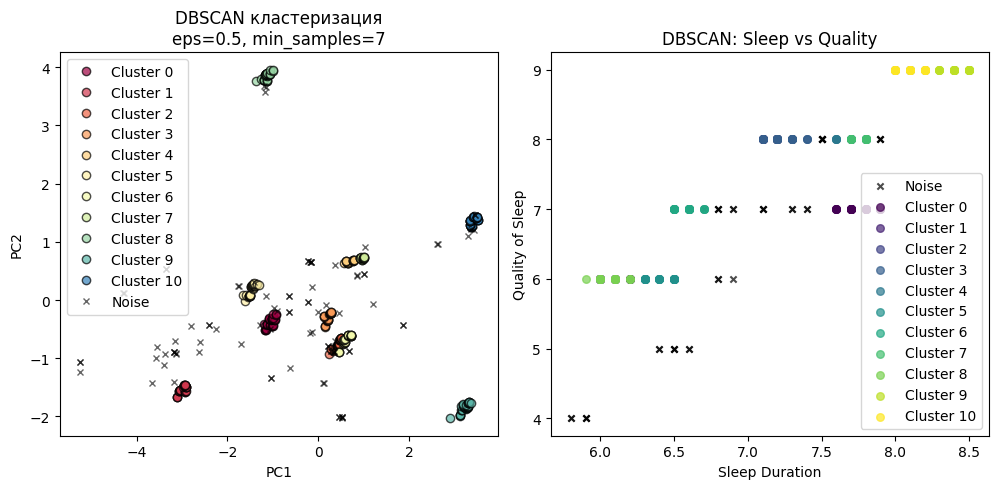

In [33]:
# Метрики для DBSCAN (без шума)
mask_db = clusters_dbscan != -1
X_valid = X[mask_db]
labels_valid = clusters_dbscan[mask_db]

if len(set(labels_valid)) > 1:
    silhouette_db = silhouette_score(X_valid, labels_valid)
    dbi_db = davies_bouldin_score(X_valid, labels_valid)
    chi_db = calinski_harabasz_score(X_valid, labels_valid)

    print("Метрики качества DBSCAN (без шума):")
    print(f"Silhouette Score: {silhouette_db:.3f}")
    print(f"Davies-Bouldin Index: {dbi_db:.3f}")
    print(f"Calinski-Harabasz Index: {chi_db:.3f}")
else:
    print("Недостаточно кластеров для расчета метрик DBSCAN")
    silhouette_db = 0

# Визуализация DBSCAN
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
unique_labels = set(clusters_dbscan)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # черный для шума
        marker = 'x'
        size = 4
        alpha = 0.6
    else:
        marker = 'o'
        size = 6
        alpha = 0.7

    class_member_mask = (clusters_dbscan == k)
    xy = X_pca[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], marker, markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=size, alpha=alpha,
             label=f'Cluster {k}' if k != -1 else 'Noise')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'DBSCAN кластеризация\neps={eps_opt}, min_samples={min_samples_opt}')
plt.legend()

plt.subplot(1, 3, 2)
# Сравнение Sleep Duration vs Quality of Sleep
for label in sorted(unique_labels):
    mask = clusters_dbscan == label
    if label == -1:
        color = 'black'
        marker = 'x'
        size = 20
    else:
        color = plt.cm.viridis(label/max(1, max(unique_labels)))
        marker = 'o'
        size = 30

    plt.scatter(df_not_processed.loc[mask, 'Sleep Duration'],
               df_not_processed.loc[mask, 'Quality of Sleep'],
               c=[color], marker=marker, s=size,
               label=f'Cluster {label}' if label != -1 else 'Noise',
               alpha=0.7)

plt.xlabel('Sleep Duration')
plt.ylabel('Quality of Sleep')
plt.title('DBSCAN: Sleep vs Quality')
plt.legend()
plt.tight_layout()
plt.show()

Silhouette Score - 0.916 Точка почти идеально внутри своего кластера

Davies–Bouldin Index - 0.130 кластеры достаточно компактны и хороши

Calinski–Harabasz Index - 7225.186 Отличное разделение кластеров — расстояния между кластерами значительно больше, чем расстояния внутри кластеров

ВЫВОД: Какой метод лучше подходит?
На основе анализа Silhouette Score лучшим методом является: DBSCAN

Почему DBSCAN лучше подходит:
1. Обнаружение шума: Выделяет аномальные случаи нарушений сна
2. Гибкость: Не требует задания числа кластеров заранее
3. Форма кластеров: Может находить кластеры произвольной формы

При K-Means кластеры пересекаются, а при DBSCAN — чётко отделяются;

Таким образом, DBSCAN лучше отражает структуру реальных данных, чем K-Means.
КАЧЕСТВО КЛАСТЕРИЗАЦИИ:
Отличное качество кластеризации
Кластеры хорошо разделены и интерпретируемы